# Modeling

In [51]:
import pandas as pd
from wrangle_2 import wrangle
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
cost, epi_census, fbi, intern, commute = wrangle()

In [3]:
cost = cost.dropna()

In [4]:
num_cost = cost.drop(columns={'msa'})

In [5]:
num_cost

parents  children  housing   food  transportation  healthcare  other  \
0           1         0     9246   3285           11075        5873   4541   
1           1         1    12489   4842           11838        8869   6280   
2           1         2    12489   7094           12709       11866   7096   
3           1         3    16805   9464           13922       14862   9518   
4           1         4    16805  11584           14309       17858  10286   
...       ...       ...      ...    ...             ...         ...    ...   
2425        2         0     9220   5638           13746       14691   5384   
2426        2         1    12123   7017           14764       18360   6935   
2427        2         2    12123   8887           15534       22030   7613   
2428        2         3    17276  10851           16743       25699  10191   
2429        2         4    17276  13279           17041       29368  11071   

      childcare  taxes   total  ...  homes_with_computer  homes_with_internet  \
0             0   5109   39129  ...                 94.7                 91.3   
1          7572   5111   57001  ...                 94.7                 91.3   
2         12797   4755   68806  ...                 94.7                 91.3   
3         14405   6253   85228  ...                 94.7                 91.3   
4         14405   5891   91138  ...                 94.7                 91.3   
...         ...    ...     ...  ...                  ...                  ...   
2425          0   7049   55728  ...                 94.7                 87.9   
2426       9045   8728   76973  ...                 94.7                 87.9   
2427      17404   9449   93040  ...                 94.7                 87.9   
2428      19977  11904  112640  ...                 94.7                 87.9   
2429      19977  11711  119723  ...                 94.7                 87.9   

      in_preschool  in_kindergarten  in_junior_high  in_high_school  \
0              5.9              2.8            43.1            22.6   
1              5.9              2.8            43.1            22.6   
2              5.9              2.8            43.1            22.6   
3              5.9              2.8            43.1            22.6   
4              5.9              2.8            43.1            22.6   
...            ...              ...             ...             ...   
2425           5.2              5.6            44.0            23.2   
2426           5.2              5.6            44.0            23.2   
2427           5.2              5.6            44.0            23.2   
2428           5.2              5.6            44.0            23.2   
2429           5.2              5.6            44.0            23.2   

      in_college_plus  less_than_high_school  high_school_to_associates  \
0                25.6                   11.2                       63.4   
1                25.6                   11.2                       63.4   
2                25.6                   11.2                       63.4   
3                25.6                   11.2                       63.4   
4                25.6                   11.2                       63.4   
...               ...                    ...                        ...   
2425             22.0                   23.3                       60.1   
2426             22.0                   23.3                       60.1   
2427             22.0                   23.3                       60.1   
2428             22.0                   23.3                       60.1   
2429             22.0                   23.3                       60.1   

      bachelors_plus  
0               25.5  
1               25.5  
2               25.5  
3               25.5  
4               25.5  
...              ...  
2425            16.6  
2426            16.6  
2427            16.6  
2428            16.6  
2429            16.6  

[2300 rows x 45 columns]

In [30]:
family_types

['single_0_child',
 'single_1_child',
 'single_2_child',
 'single_3_child',
 'single_4_child',
 'married_0_child',
 'married_1_child',
 'married_2_child',
 'married_3_child',
 'married_4_child']

In [39]:
married_0_child

msa  parents  children  housing  food  \
5                     Abilene, TX MSA        2         0     9586  6023   
15                      Akron, OH MSA        2         0     8684  6466   
25                     Albany, GA MSA        2         0     8435  6360   
35    Albany-Schenectady-Troy, NY MSA        2         0    11927  7351   
55                 Alexandria, LA MSA        2         0     8500  5950   
...                               ...      ...       ...      ...   ...   
2385               Wilmington, NC MSA        2         0    11417  6841   
2395            Winchester, VA-WV MSA        2         0    10711  6629   
2405                   Yakima, WA MSA        2         0    10357  6219   
2415                Yuba City, CA MSA        2         0    11521  6214   
2425                     Yuma, AZ MSA        2         0     9220  5638   

      transportation  healthcare  other  childcare  taxes  ...  \
5              13455       11747   5656          0   5905  ...   
15             12656        9393   5489          0   5908  ...   
25             13340       11224   5361          0   7361  ...   
35             13401       12355   6985          0   8971  ...   
55             13846       12087   5236          0   6933  ...   
...              ...         ...    ...        ...    ...  ...   
2385           13714       11904   6615          0   8462  ...   
2395           14808       12091   6283          0   8782  ...   
2405           14559        8833   6006          0   5810  ...   
2415           14954       11945   6426          0   7264  ...   
2425           13746       14691   5384          0   7049  ...   

      homes_with_computer  homes_with_internet  in_preschool  in_kindergarten  \
5                    94.7                 91.3           5.9              2.8   
15                   96.0                 92.0           5.3              4.0   
25                   91.0                 83.1           7.7              7.7   
35                   95.6                 91.4           5.7              3.7   
55                   92.7                 86.9           6.9              4.6   
...                   ...                  ...           ...              ...   
2385                 97.1                 92.8           6.4              5.1   
2395                 95.6                 89.9           7.4              4.6   
2405                 94.3                 90.2           5.3              5.6   
2415                 95.0                 89.9           2.9              5.7   
2425                 94.7                 87.9           5.2              5.6   

      in_junior_high  in_high_school  in_college_plus  less_than_high_school  \
5               43.1            22.6             25.6                   11.2   
15              38.8            20.3             31.5                    7.2   
25              40.5            20.2             24.0                   11.0   
35              37.2            19.4             34.0                    6.7   
55              44.8            24.6             19.1                   13.5   
...              ...             ...              ...                    ...   
2385            36.1            19.3             33.1                    6.5   
2395            43.6            24.2             20.1                   11.3   
2405            46.8            26.7             15.5                   19.7   
2415            46.3            21.8             23.3                   17.2   
2425            44.0            23.2             22.0                   23.3   

      high_school_to_associates  bachelors_plus  
5                          63.4            25.5  
15                         55.9            36.9  
25                         66.9            22.0  
35                         52.0            41.2  
55                         63.2            23.3  
...                         ...             ...  
2385                       51.3            42.1  
2395  

In [50]:
i

'msa'

In [49]:
for i in dataframes[family_type]:
    i = i.drop(columns={'msa'})
    scaler = sklearn.preprocessing.MinMaxScaler()
    # Note that we only call .fit with the training data,
    # but we use .transform to apply the scaling to all the data splits.
    scaler.fit(i)
    n = scaler.transform(i)
    k = pd.DataFrame(n, columns = i.columns, index = i.index.values)

AttributeError: 'str' object has no attribute 'drop'

In [ ]:
X = min_max_cost_df[['parents', 'children', 'housing', 'food', 'transportation', 
          'healthcare', 'other', 'childcare', 'taxes', 'total', 
          'median_family_income', 'under_5', '5-9', '10-14', 
          '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', 
          '45-59', '60-89', '90+', 'murder_and_nonnegligent_manslaughter', 
          'rape', 'robbery', 'aggravated_assault', 'property_crime', 
          'burglary', 'larceny_theft', 'motor_vehicle_theft', 'homes_with_computer', 
          'homes_with_internet', 'less_than_high_school', 
          'high_school_to_associates', 'bachelors_plus']]

X_agg = min_max_cost_df[['affordability_ratio', 'est_commute', 'violent_crime', 
              'homes_with_computer', 'homes_with_internet', 'less_than_high_school', 'high_school_to_associates', 
              'bachelors_plus']]


with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10,5))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 10)}).plot(marker='x')
    plt.xticks(range(2, 10))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.show()
    
    
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10,5))
    pd.Series({k: KMeans(k).fit(X_agg).inertia_ for k in range(2, 10)}).plot(marker='x')
    plt.xticks(range(2, 10))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.show()

In [26]:
# create a dictionary to map the number of parents and children to a string
mapping = {(1, i): f'single_{i}_child' for i in range(5)}
mapping.update({(2, i): f'married_{i}_child' for i in range(5)})
# create a new column in the cost dataframe that maps the number of parents and children to a string
cost['family_type'] = cost.apply(lambda row: mapping[(row['parents'], row['children'])], axis=1)
# split the cost dataframe into ten dataframes based on the family_type column and drop the family_type column
dataframes = {family_type: df.drop(columns='family_type') for family_type, df in cost.groupby('family_type')}
family_types = ['single_0_child', 'single_1_child', 'single_2_child', 'single_3_child', 'single_4_child',
                'married_0_child', 'married_1_child', 'married_2_child', 'married_3_child', 'married_4_child']
# create a variable for each dataframe
for family_type in family_types:
    globals()[family_type] = dataframes[family_type]
single_types = [f'single_{i}_child' for i in range(5)]
married_types = [f'married_{i}_child' for i in range(5)]

## Min_max

In [133]:
# no touchy
def fam_plode(x, scaler):
    x = x.drop(columns={'msa'})
    scaler = scaler
    scaler.fit(x)
    fam = scaler.transform(x)
    fam_df = pd.DataFrame(fam, columns = x.columns, index = x.index.values)
    X_opt = fam_df[['affordability_ratio', 'est_commute', 'violent_crime']]

    kmeans = KMeans(n_clusters=3)
    kmeans.fit(X_opt)

    all_cluster = kmeans.predict(X_opt)
    X_opt['clusters'] = all_cluster

    plt.figure(figsize=(2,4))
    sns.pairplot(data = X_opt, hue='clusters')
    return plt.show()

In [163]:
def fam_plode(x, scaler):
    x = x.drop(columns={'msa'})
    scaler = scaler
    scaler.fit(x)
    fam = scaler.transform(x)
    fam_df = pd.DataFrame(fam, columns = x.columns, index = x.index.values)
    X_opt = fam_df[['parents', 'children', 'housing', 'food', 'transportation', 
          'healthcare', 'other', 'childcare', 'taxes', 'total', 
          'median_family_income', 'under_5', '5-9','60-89', '90+', 'murder_and_nonnegligent_manslaughter', 
          'rape', 'robbery', 'aggravated_assault', 'property_crime', 
          'burglary', 'larceny_theft', 'motor_vehicle_theft', 
          'homes_with_internet', 'less_than_high_school', 
          'high_school_to_associates', 'bachelors_plus']]


    kmeans = KMeans(n_clusters=4)
    kmeans.fit(X_opt)

    all_cluster = kmeans.predict(X_opt)
    fam_df['clusters'] = all_cluster
    plot_df = ['affordability_ratio', 'est_commute', 'violent_crime', 'clusters']

    plt.figure(figsize=(2,4))
    sns.pairplot(data = fam_df[plot_df], hue='clusters')
    return plt.show()

<Figure size 200x400 with 0 Axes>

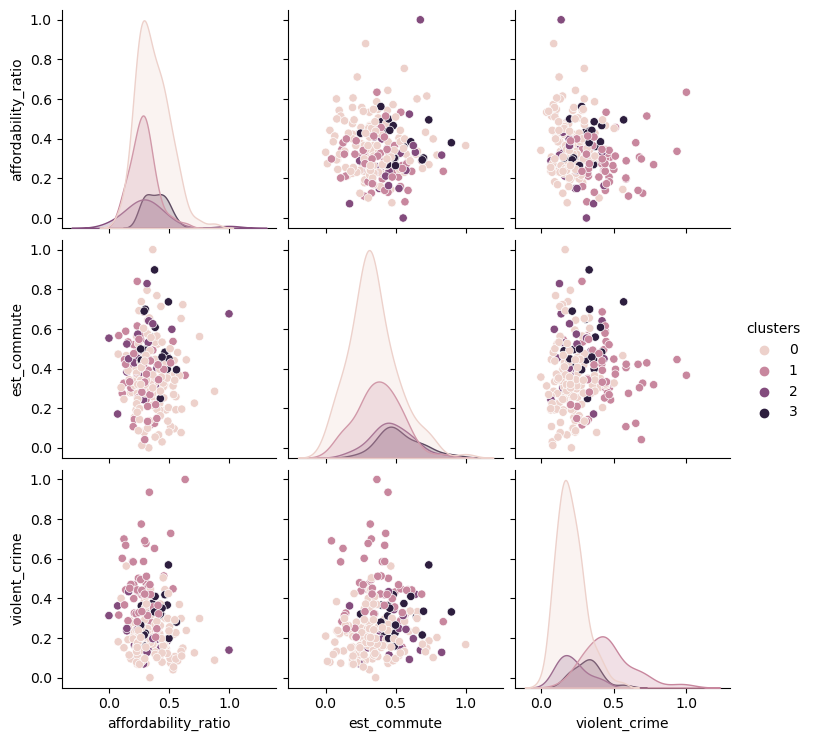

In [164]:
fam_plode(x = single_0_child, scaler = sklearn.preprocessing.MinMaxScaler())

<Figure size 200x400 with 0 Axes>

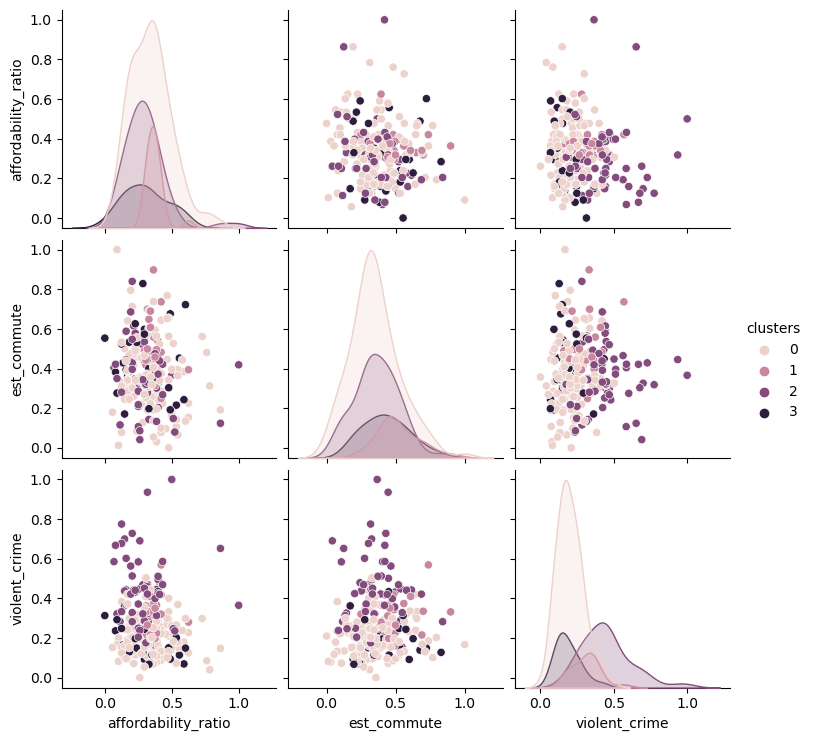

In [165]:
fam_plode(x = single_1_child, scaler = sklearn.preprocessing.MinMaxScaler())

<Figure size 200x400 with 0 Axes>

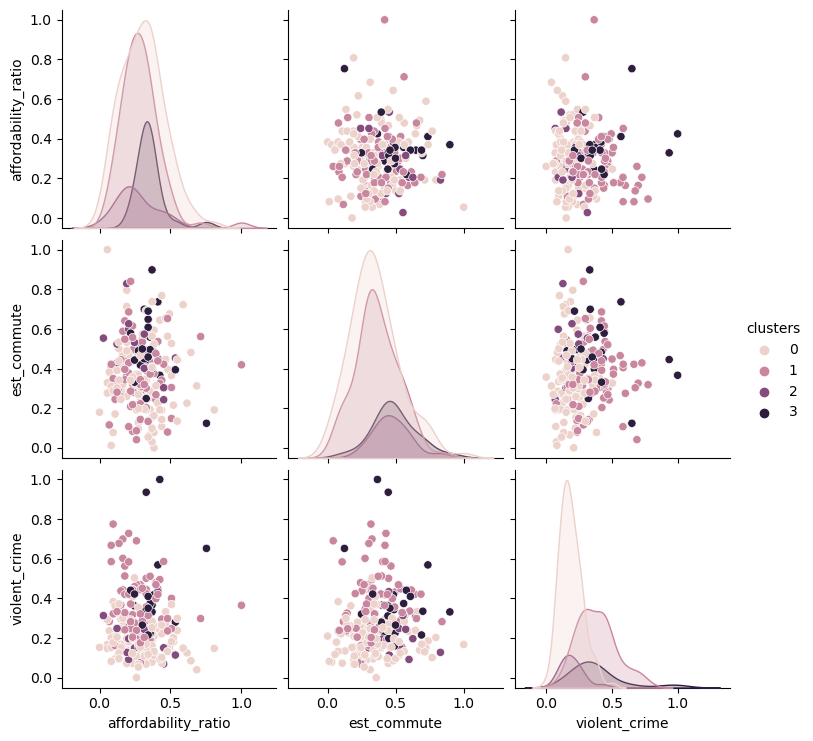

In [167]:
fam_plode(x = single_2_child, scaler = sklearn.preprocessing.MinMaxScaler())

<Figure size 200x400 with 0 Axes>

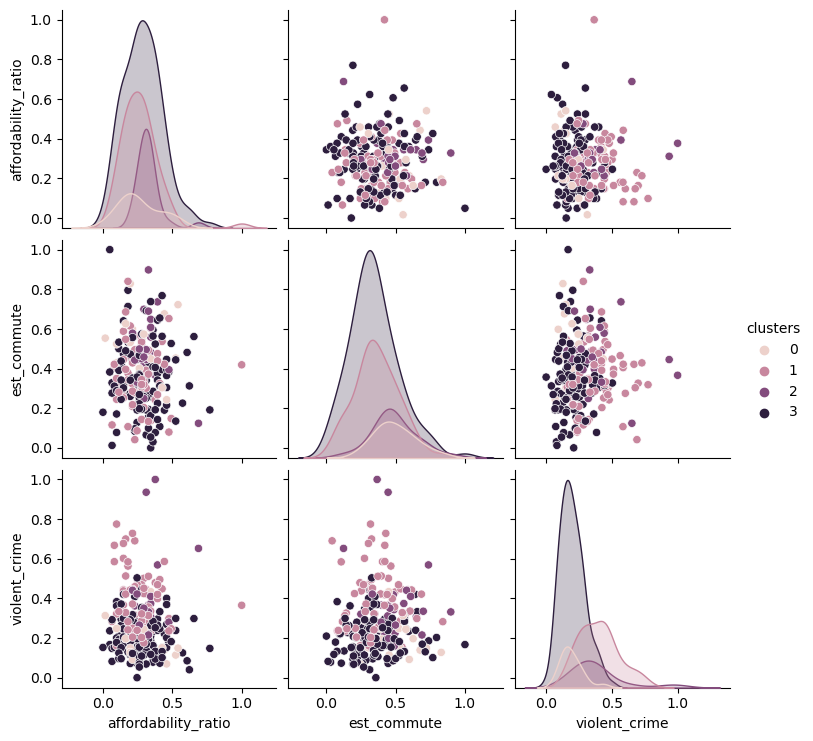

In [168]:
fam_plode(x = single_3_child, scaler = sklearn.preprocessing.MinMaxScaler())

<Figure size 200x400 with 0 Axes>

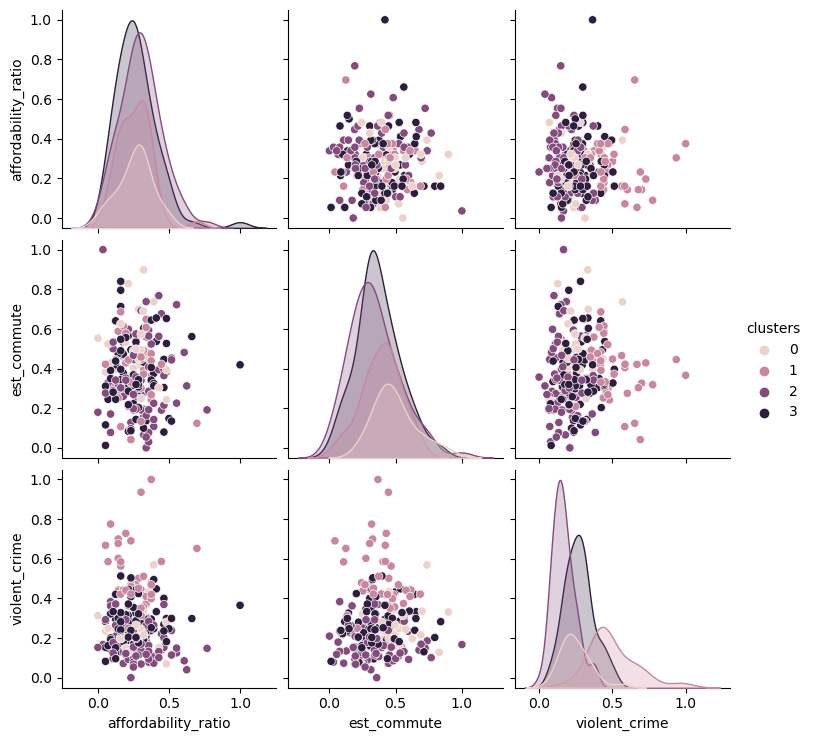

In [169]:
fam_plode(x = single_4_child, scaler = sklearn.preprocessing.MinMaxScaler())

<Figure size 200x400 with 0 Axes>

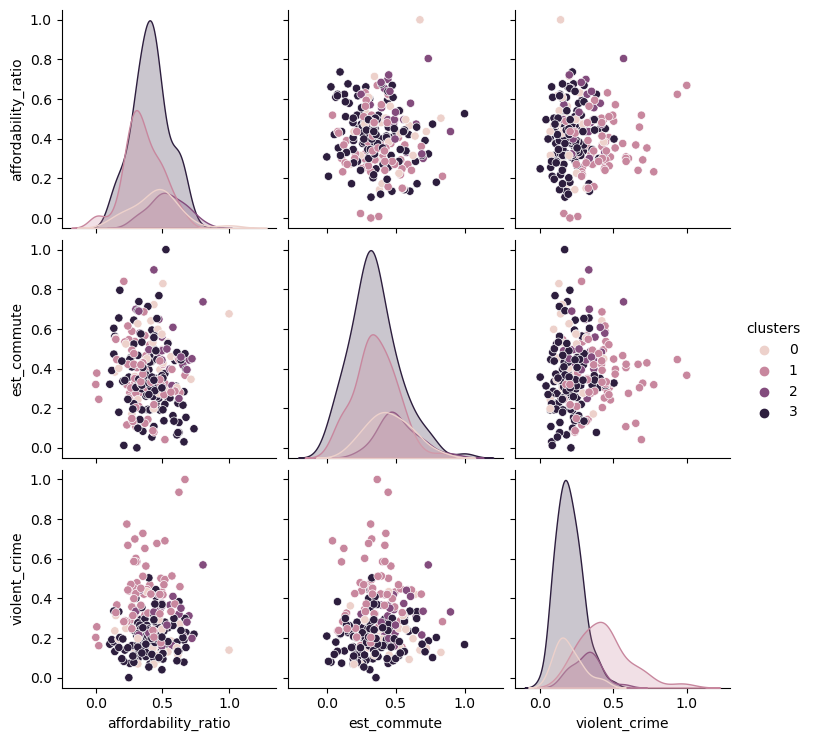

In [170]:
fam_plode(x = married_0_child, scaler = sklearn.preprocessing.MinMaxScaler())

<Figure size 200x400 with 0 Axes>

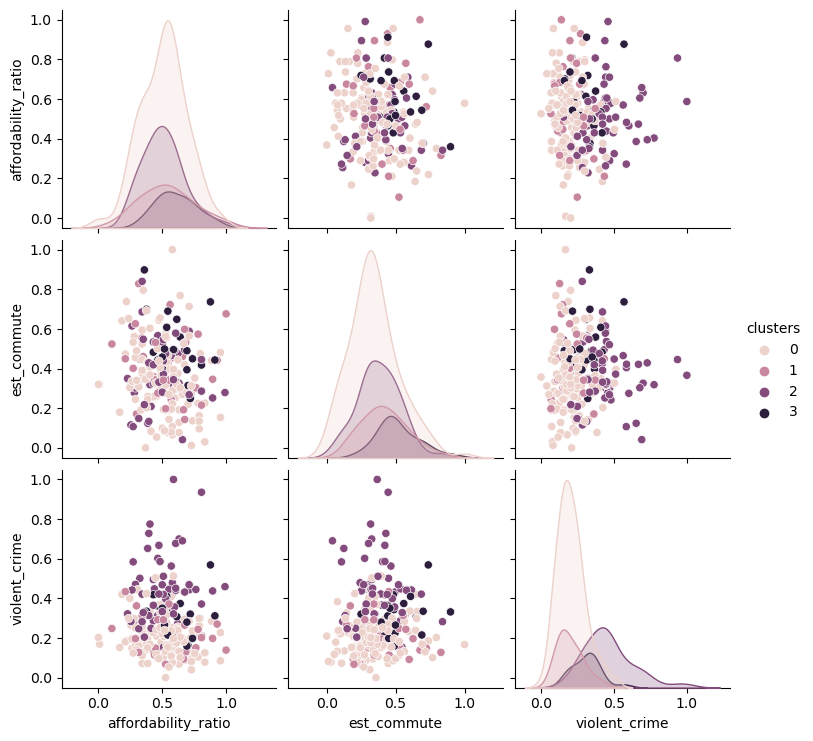

In [171]:
fam_plode(x = married_1_child, scaler = sklearn.preprocessing.MinMaxScaler())

<Figure size 200x400 with 0 Axes>

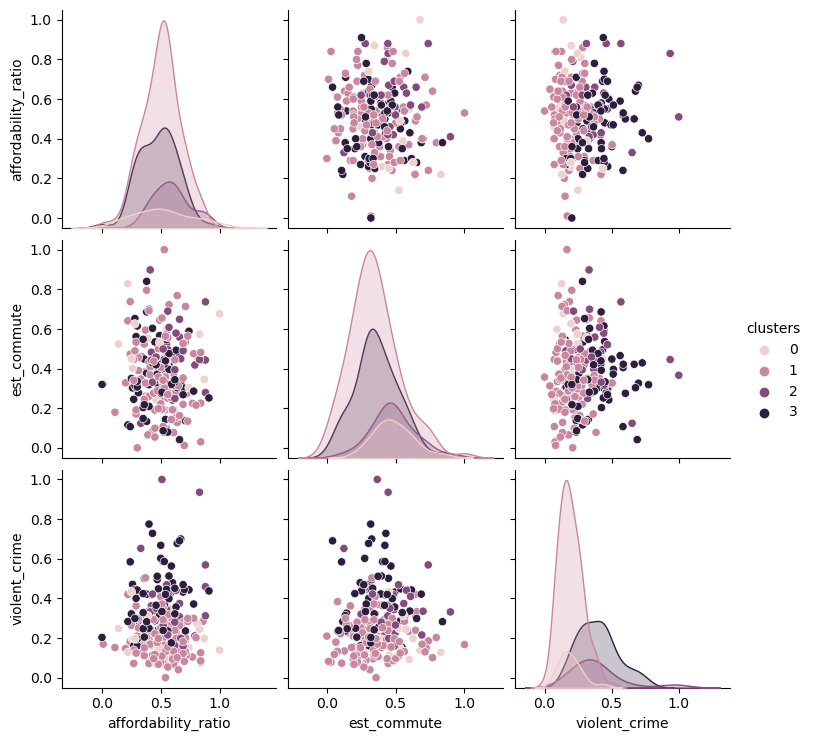

In [172]:
fam_plode(x = married_2_child, scaler = sklearn.preprocessing.MinMaxScaler())

<Figure size 200x400 with 0 Axes>

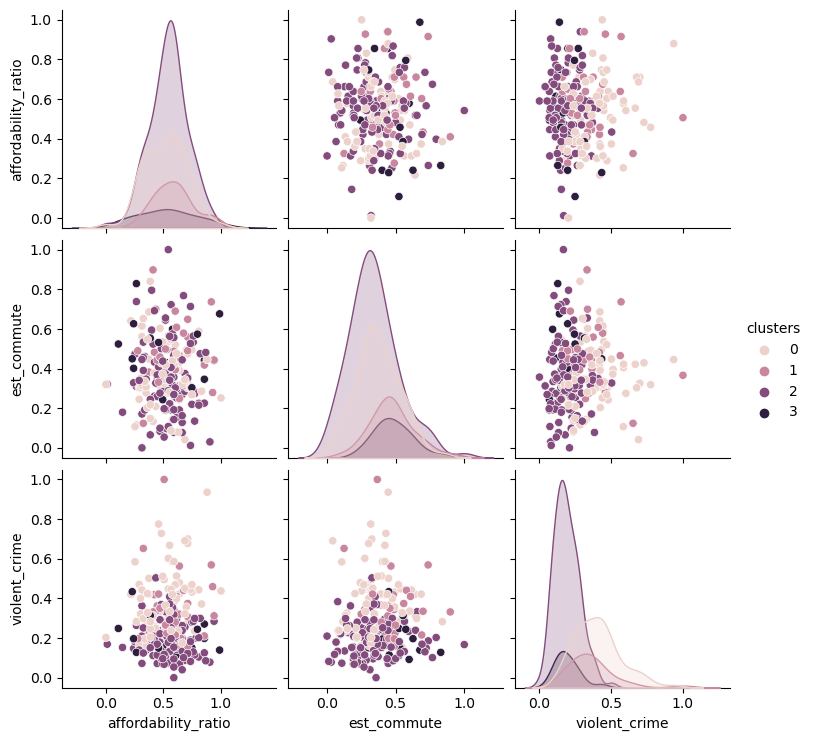

In [173]:
fam_plode(x = married_3_child, scaler = sklearn.preprocessing.MinMaxScaler())

<Figure size 200x400 with 0 Axes>

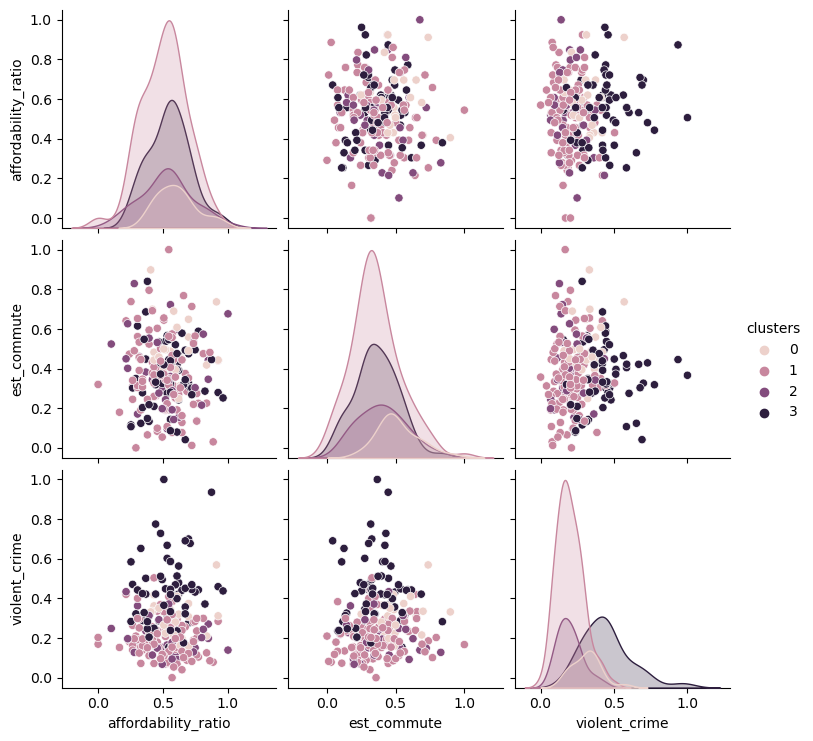

In [174]:
fam_plode(x = married_4_child, scaler = sklearn.preprocessing.MinMaxScaler())

## Standard

<Figure size 200x400 with 0 Axes>

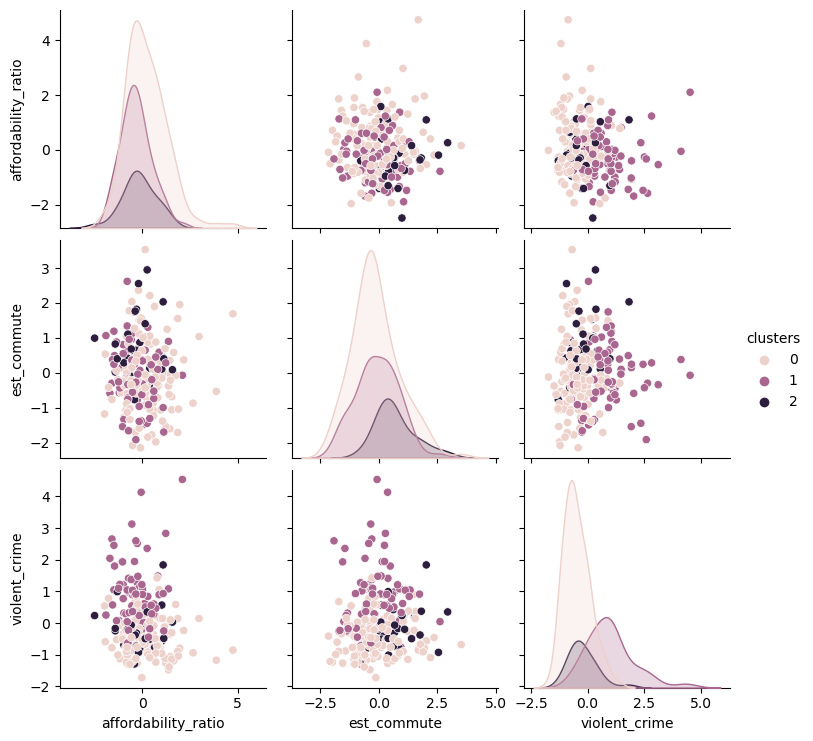

In [161]:
fam_plode(x = single_0_child, scaler = sklearn.preprocessing.StandardScaler())

<Figure size 200x400 with 0 Axes>

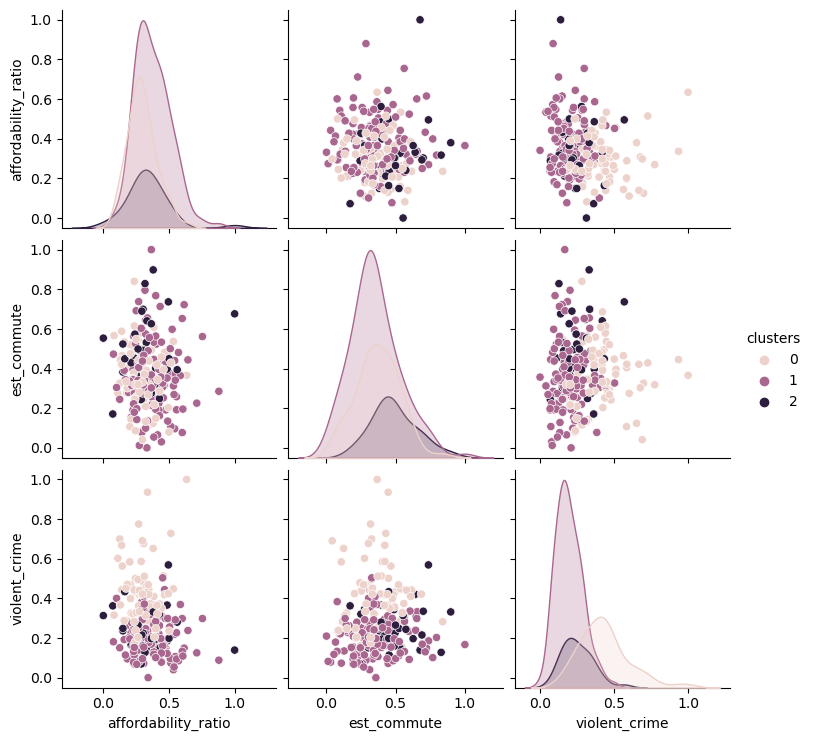

In [151]:
fam_plode(x = single_1_child, scaler = sklearn.preprocessing.StandardScaler())

<Figure size 200x400 with 0 Axes>

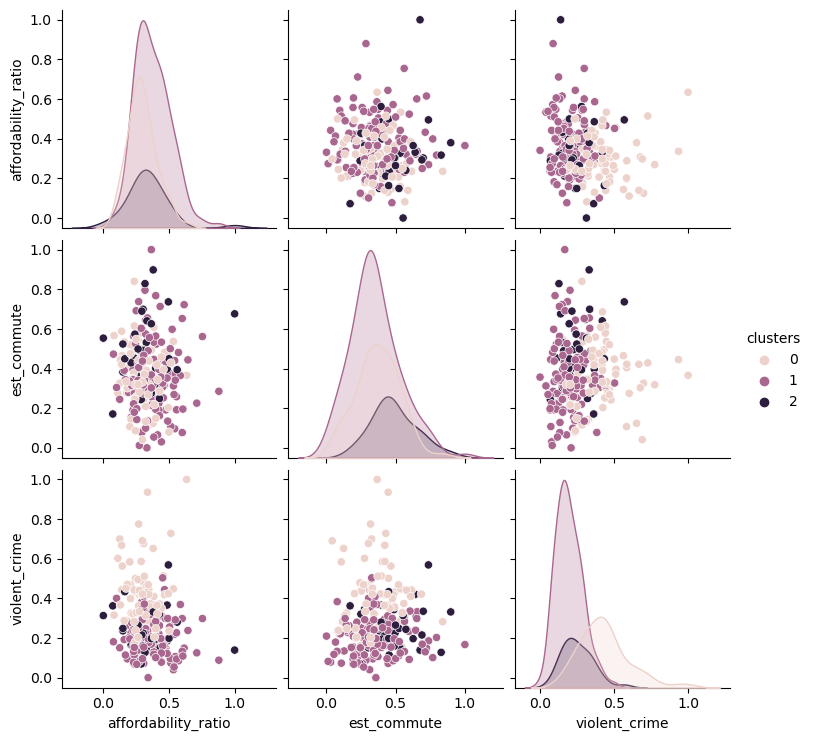

In [151]:
fam_plode(x = single_2_child, scaler = sklearn.preprocessing.StandardScaler())

<Figure size 200x400 with 0 Axes>

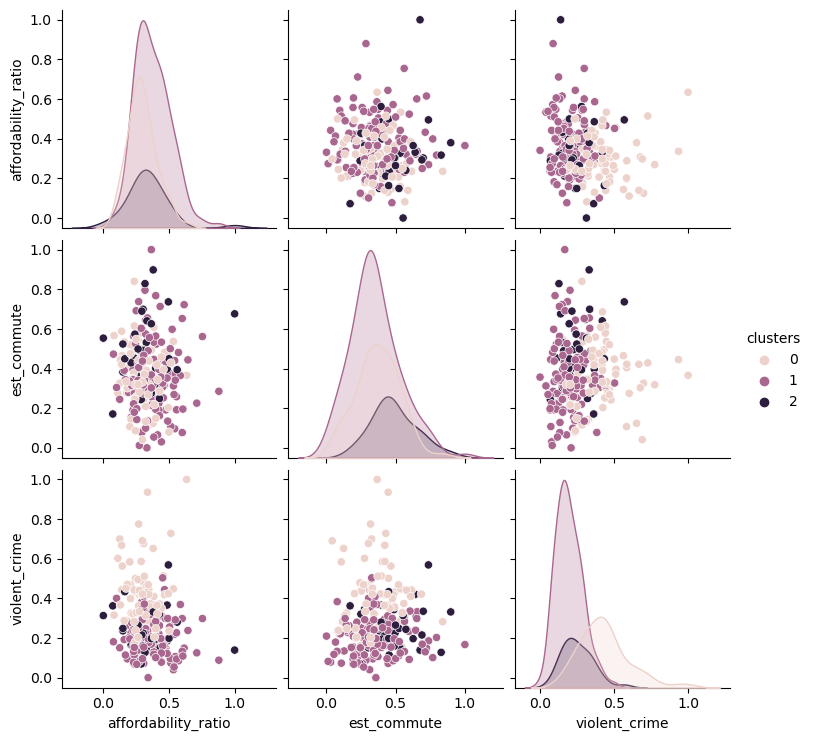

In [151]:
fam_plode(x = single_3_child, scaler = sklearn.preprocessing.StandardScaler())

<Figure size 200x400 with 0 Axes>

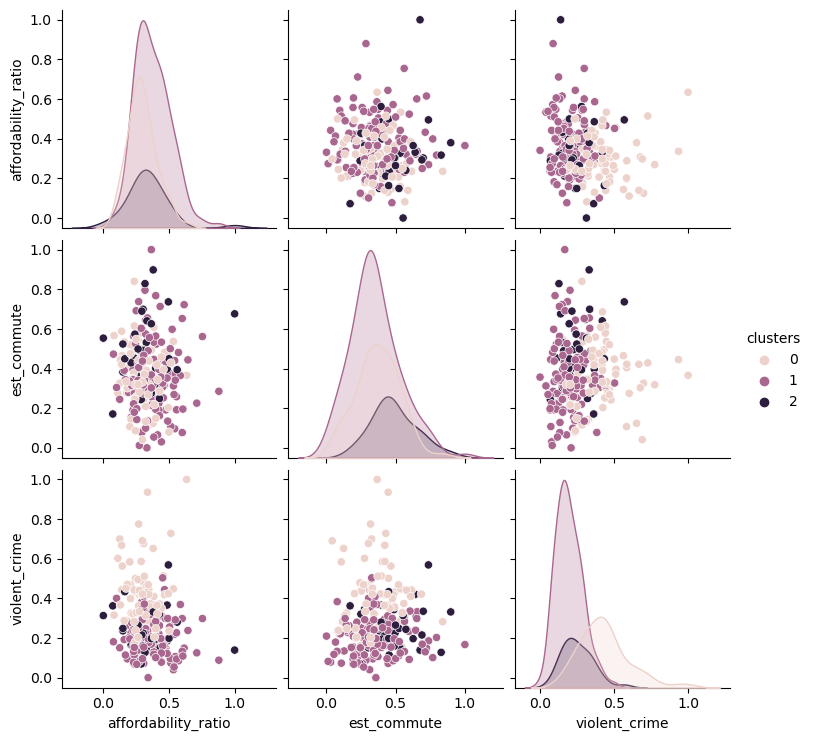

In [151]:
fam_plode(x = single_4_child, scaler = sklearn.preprocessing.StandardScaler())

<Figure size 200x400 with 0 Axes>

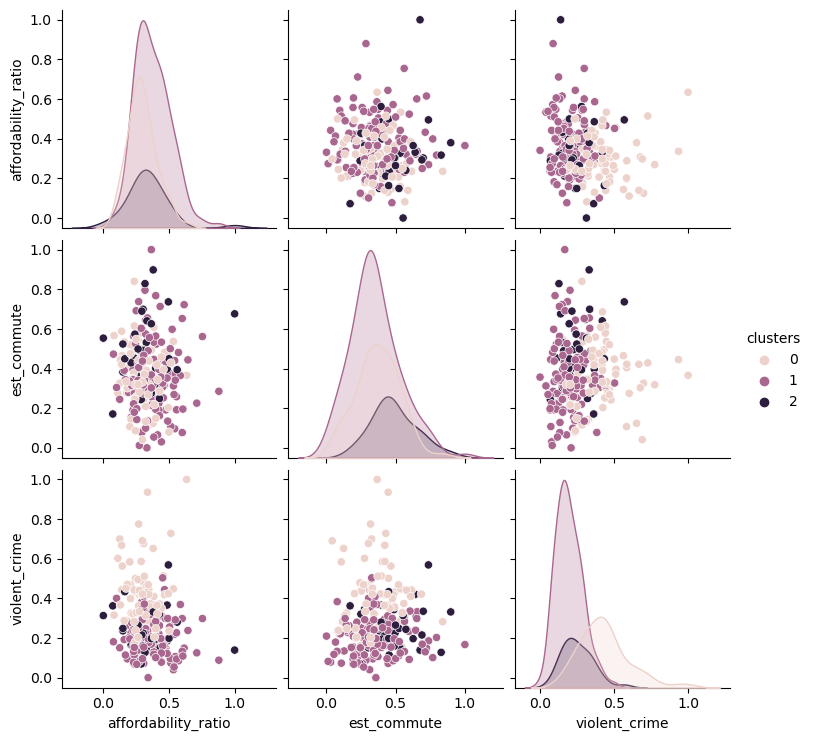

In [151]:
fam_plode(x = married_0_child, scaler = sklearn.preprocessing.StandardScaler())

<Figure size 200x400 with 0 Axes>

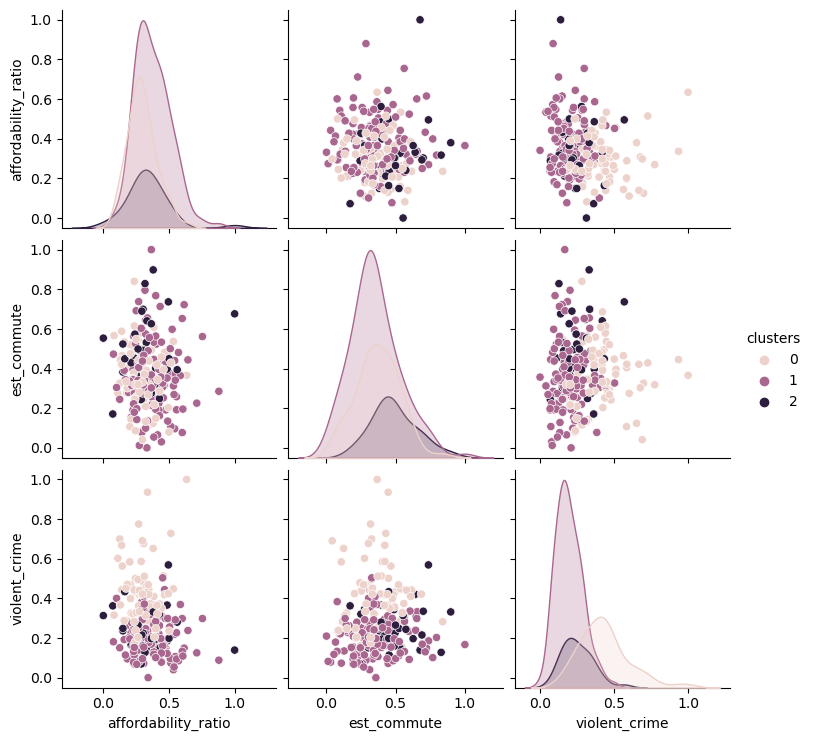

In [151]:
fam_plode(x = married_1_child, scaler = sklearn.preprocessing.StandardScaler())

<Figure size 200x400 with 0 Axes>

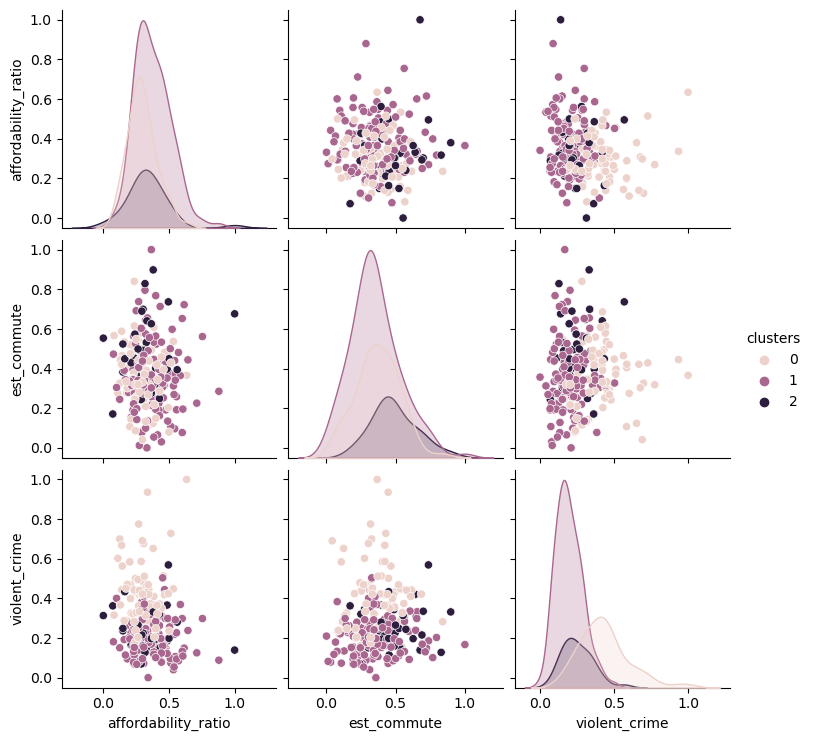

In [151]:
fam_plode(x = married_2_child, scaler = sklearn.preprocessing.StandardScaler())

<Figure size 200x400 with 0 Axes>

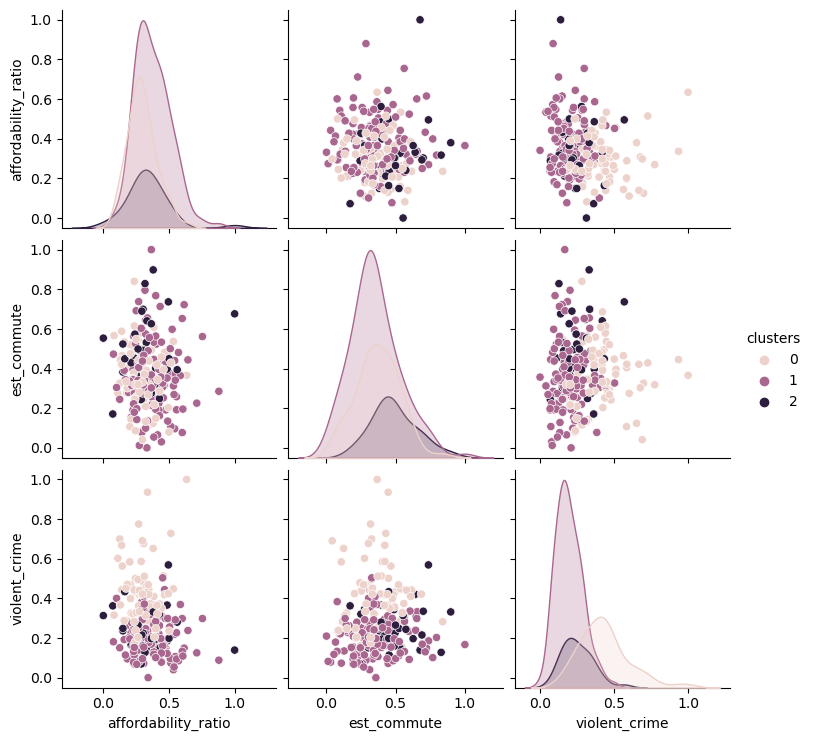

In [151]:
fam_plode(x = married_3_child, scaler = sklearn.preprocessing.StandardScaler())

<Figure size 200x400 with 0 Axes>

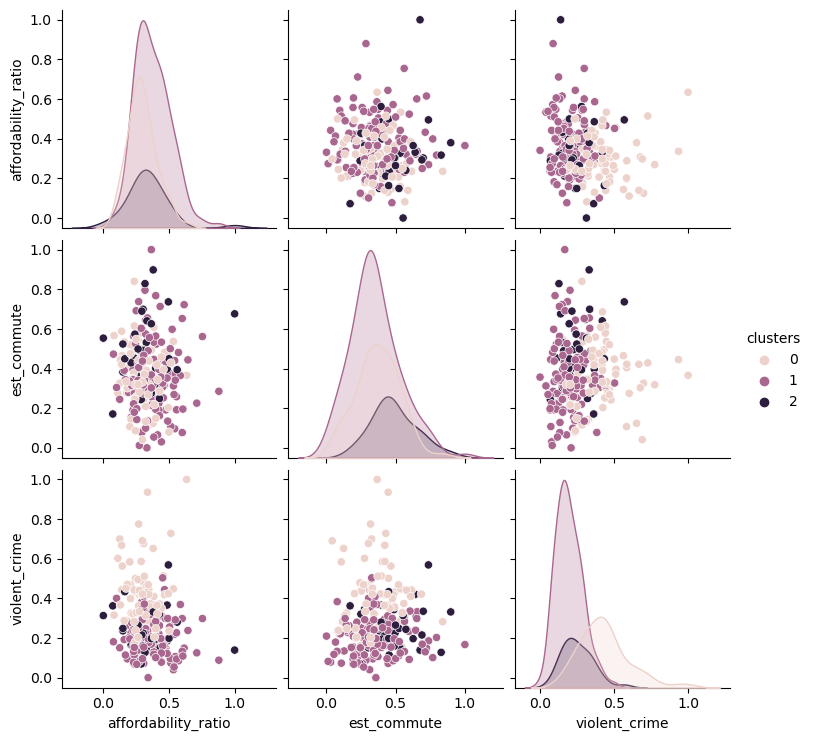

In [151]:
fam_plode(x = married_4_child, scaler = sklearn.preprocessing.StandardScaler())

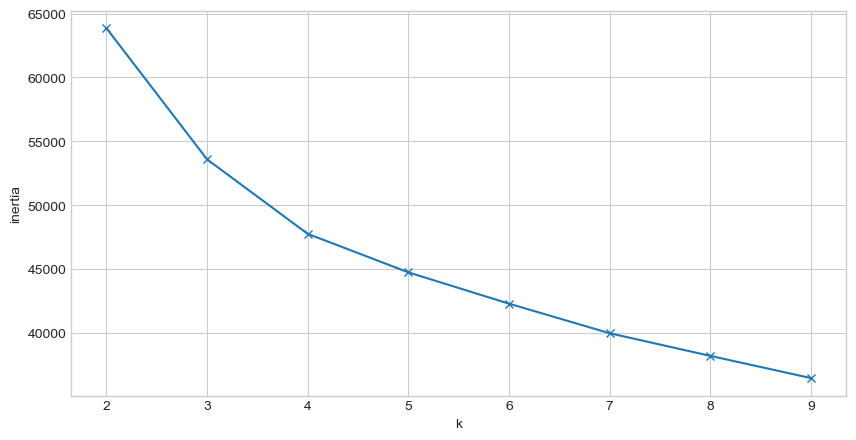

In [18]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10,5))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 10)}).plot(marker='x')
    plt.xticks(range(2, 10))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.show()

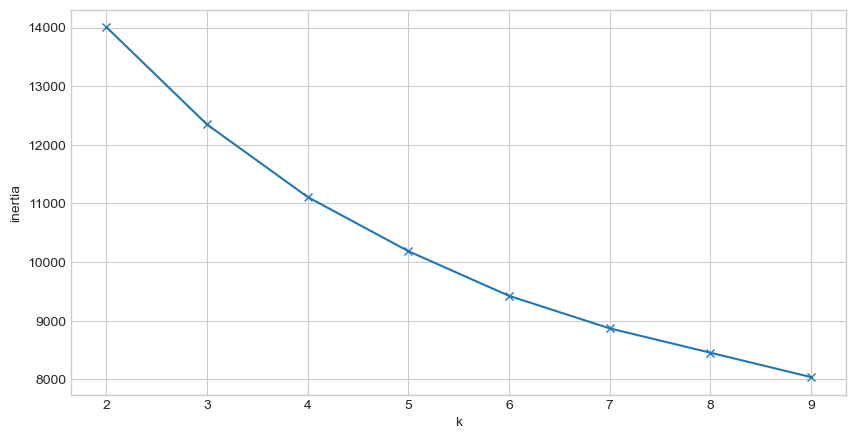

In [19]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10,5))
    pd.Series({k: KMeans(k).fit(X_agg).inertia_ for k in range(2, 10)}).plot(marker='x')
    plt.xticks(range(2, 10))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.show()